In [1]:
# Load Library atau modul untuk SVM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os
from IPython.display import display, HTML

# Memuat data data latih dan menampilkan data latih
data_file_path = "../data_latih.xlsx"
data = pd.read_excel(data_file_path)
print("Data Loaded:")
display(data)




C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Data Loaded:


,Nama,L/P,Penghasilan,Status Ekonomi,Jumlah Tanggungan,Layak PIP,Alasan Layak PIP,Tahun Penerimaan,Jumlah Bantuan,Status Bantuan,Status Kesesuaian
0,Aam Garot Hs,P,"Rp. 1,000,000 - Rp. 1,999,999",MISKIN,1,Tidak,NaN,2023,0,Diterima,Tidak Layak
1,Aan Priatna,P,"Rp. 500,000 - Rp. 999,999",CUKUP,2,Tidak,NaN,2023,1500000,Diterima,Tidak Layak
2,Abd Kahar,P,"Rp. 500,000 - Rp. 999,999",MISKIN,5,Ya,Siswa Miskin/Rentan Miskin,2023,1500000,Diterima,Sesuai
3,Abd Kahar,P,"Rp. 1,000,000 - Rp. 1,999,999",CUKUP,4,Tidak,NaN,2023,1500000,Diterima,Tidak Layak
4,Abd Manap,P,"Rp. 500,000 - Rp. 999,999",SANGAT MISKIN,3,Ya,Siswa Miskin/Rentan Miskin,2023,0,Diproses,Sesuai
...,...,...,...,...,...,...,...,...,...,...,...
630,Zulfiadi,P,"Rp. 500,000 - Rp. 999,999",MISKIN,1,Tidak,NaN,2023,0,Diproses,Tidak Layak
631,Zulfian,P,"Rp. 1,000,000 - Rp. 1,999,999",CUKUP,0,Tidak,NaN,2023,0,Diterima,Tidak Layak
632,Zulkarnain,P,"Rp. 500,000 - Rp. 999,999",CUKUP,3,Tidak,NaN,2023,0,Diterima,Tidak Layak
633,Zulkarnain Nasution,P,"Rp. 500,000 - Rp. 999,999",CUKUP,4,Tidak,NaN,2023,0,Diproses,Tidak Layak


In [3]:
# Mengisi nilai yang hilang
data['Alasan Layak PIP'] = data['Alasan Layak PIP'].fillna('Tidak Layak')
print("Nilai yang hilang diisi:")
display(data.head())


Nilai yang hilang diisi:


,Nama,L/P,Penghasilan,Status Ekonomi,Jumlah Tanggungan,Layak PIP,Alasan Layak PIP,Tahun Penerimaan,Jumlah Bantuan,Status Bantuan,Status Kesesuaian
0,Aam Garot Hs,P,"Rp. 1,000,000 - Rp. 1,999,999",MISKIN,1,Tidak,Tidak Layak,2023,0,Diterima,Tidak Layak
1,Aan Priatna,P,"Rp. 500,000 - Rp. 999,999",CUKUP,2,Tidak,Tidak Layak,2023,1500000,Diterima,Tidak Layak
2,Abd Kahar,P,"Rp. 500,000 - Rp. 999,999",MISKIN,5,Ya,Siswa Miskin/Rentan Miskin,2023,1500000,Diterima,Sesuai
3,Abd Kahar,P,"Rp. 1,000,000 - Rp. 1,999,999",CUKUP,4,Tidak,Tidak Layak,2023,1500000,Diterima,Tidak Layak
4,Abd Manap,P,"Rp. 500,000 - Rp. 999,999",SANGAT MISKIN,3,Ya,Siswa Miskin/Rentan Miskin,2023,0,Diproses,Sesuai


In [4]:
# Encoding label atau konversi string ke numerik untuk memudahkan proses SVM
label_cols = ['L/P', 'Penghasilan', 'Status Ekonomi', 'Layak PIP', 'Alasan Layak PIP', 'Status Bantuan', 'Status Kesesuaian']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("Data setelah encoding:")
display(data.head())



Data setelah encoding:


,Nama,L/P,Penghasilan,Status Ekonomi,Jumlah Tanggungan,Layak PIP,Alasan Layak PIP,Tahun Penerimaan,Jumlah Bantuan,Status Bantuan,Status Kesesuaian
0,Aam Garot Hs,0,1,1,1,0,1,2023,0,1,1
1,Aan Priatna,0,3,0,2,0,1,2023,1500000,1,1
2,Abd Kahar,0,3,1,5,1,0,2023,1500000,1,0
3,Abd Kahar,0,1,0,4,0,1,2023,1500000,1,1
4,Abd Manap,0,3,2,3,1,0,2023,0,0,0


In [5]:
# Memisahkan fitur dan label
X = data.drop(columns=['Status Kesesuaian', 'Nama'])
y = data['Status Kesesuaian']

print("Fitur (X):")
display(X.head())
print("Label (y):")
display(y.head())



Fitur (X):


,L/P,Penghasilan,Status Ekonomi,Jumlah Tanggungan,Layak PIP,Alasan Layak PIP,Tahun Penerimaan,Jumlah Bantuan,Status Bantuan
0,0,1,1,1,0,1,2023,0,1
1,0,3,0,2,0,1,2023,1500000,1
2,0,3,1,5,1,0,2023,1500000,1
3,0,1,0,4,0,1,2023,1500000,1
4,0,3,2,3,1,0,2023,0,0


Label (y):


0    1
1    1
2    0
3    1
4    0
Name: Status Kesesuaian, dtype: int32

In [18]:
# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

print("Data pelatihan dan pengujian:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape, "\n")



Data pelatihan dan pengujian:
X_train shape: (476, 9)
X_test shape: (159, 9)
y_train shape: (476,)
y_test shape: (159,) 



In [19]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Fitur setelah standarisasi:")
print("X_train:")
print(X_train[:5])
print("X_test:")
print(X_test[:5], "\n")

Fitur setelah standarisasi:
X_train:
[[ 0.         -0.84944824 -1.23975588 -1.49521579 -0.92702481  0.92702481
   0.         -1.02123379 -0.99580711]
 [ 0.          0.95562927 -0.00259907  0.31118704  1.07871978 -1.07871978
   0.          0.97920771  1.00421054]
 [ 0.         -0.84944824  1.23455774  0.31118704  1.07871978 -1.07871978
   0.          0.97920771  1.00421054]
 [ 0.          1.85816802  1.23455774  0.91332132  1.07871978 -1.07871978
   0.         -1.02123379 -0.99580711]
 [ 0.          0.05309051 -0.00259907  1.5154556   1.07871978 -1.07871978
   0.         -1.02123379 -0.99580711]]
X_test:
[[ 0.         -0.84944824  1.23455774  0.91332132  1.07871978 -1.07871978
   0.          0.97920771  1.00421054]
 [ 0.          0.95562927 -0.00259907  0.91332132  1.07871978 -1.07871978
   0.          0.97920771 -0.99580711]
 [ 0.         -0.84944824 -0.00259907  1.5154556   1.07871978 -1.07871978
   0.          0.97920771  1.00421054]
 [ 0.         -0.84944824  1.23455774  0.31118704 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Definisikan parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Lakukan Grid Search untuk menemukan parameter C terbaik
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Gunakan model terbaik dari Grid Search
best_svm_model = grid_search.best_estimator_

print("Model SVM terbaik dilatih dengan parameter C:", grid_search.best_params_['C'], "\n")

# Evaluasi model terbaik
y_pred = best_svm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Menyimpan model dan scaler
def save_model_and_scaler(model, scaler, model_filename, scaler_filename):
    model_dir = os.path.dirname(model_filename)
    scaler_dir = os.path.dirname(scaler_filename)
    
    if model_dir and not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    if scaler_dir and not os.path.exists(scaler_dir):
        os.makedirs(scaler_dir)
    
    joblib.dump(model, model_filename)
    joblib.dump(scaler, scaler_filename)
    print(f"Model saved to {model_filename}")
    print(f"Scaler saved to {scaler_filename}\n")

model_filename = 'best_svm_model.joblib'
scaler_filename = 'scaler.joblib'
save_model_and_scaler(best_svm_model, scaler, model_filename, scaler_filename)


Model SVM terbaik dilatih dengan parameter C: 0.1 

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       1.00      1.00      1.00        77
           2       0.87      0.90      0.88        58

    accuracy                           0.91       159
   macro avg       0.86      0.85      0.86       159
weighted avg       0.91      0.91      0.91       159

Accuracy: 0.9119496855345912
Model saved to best_svm_model.joblib
Scaler saved to scaler.joblib



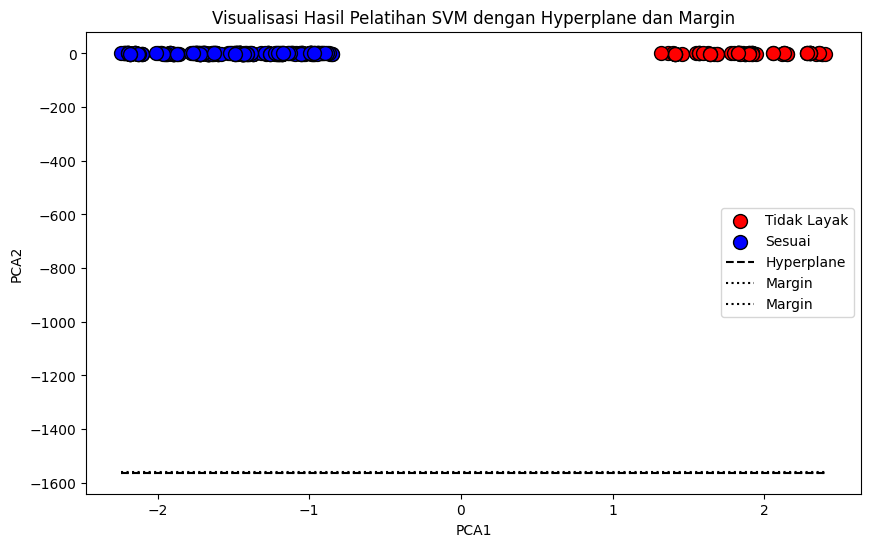

Tabel Hasil Klasifikasi:


,PCA1,PCA2,Nama,Layak PIP,Status Kesesuaian,Nilai SVM
0,2.175712,-1.311195,Heri Susanto,Layak,NaN,2.222236
1,1.567163,0.131768,Samidi,Layak,Tidak Layak,2.190498
2,1.902307,-1.866926,Ahmad Syafii,Layak,NaN,2.190527
3,1.868857,-0.288127,Rahmad,Layak,NaN,2.242435
4,2.388978,-0.279927,Paiman,Layak,NaN,2.190508
...,...,...,...,...,...,...
154,1.180358,0.241672,Supianto,Layak,NaN,2.242408
155,1.120772,-0.061287,Dedi Irawan,Layak,NaN,2.242423
156,-1.382668,-0.753528,Ngatimin,Tidak Layak,Sesuai,2.222301
157,-0.979415,-1.263584,Poniran,Tidak Layak,Sesuai,2.222232


Hasil klasifikasi disimpan dalam file: hasil_klasifikasi.xlsx


In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# PCA untuk mengurangi dimensi data menjadi 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Menambahkan kolom PCA ke data latih
train_data = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
train_data['Status Kesesuaian'] = y_train.values

# Visualisasi dengan matplotlib
plt.figure(figsize=(10, 6))

# Warna berdasarkan status kesesuaian
colors = {1: 'blue', 0: 'red'}
labels = {1: 'Sesuai', 0: 'Tidak Layak'}

# Scatter plot untuk setiap titik data
for status in [0, 1]:
    subset = train_data[train_data['Status Kesesuaian'] == status]
    plt.scatter(subset['PCA1'], subset['PCA2'], c=colors[status], label=labels[status], edgecolor='k', s=100)

# Menambahkan hyperplane
w = best_svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(train_data['PCA1'].min(), train_data['PCA1'].max())
yy = a * xx - (best_svm_model.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k--', label='Hyperplane')

# Margin
margin = 1 / np.sqrt(np.sum(best_svm_model.coef_ ** 2))
yy_margin1 = yy + np.sqrt(1 + a ** 2) * margin
yy_margin2 = yy - np.sqrt(1 + a ** 2) * margin
plt.plot(xx, yy_margin1, 'k:', label='Margin')
plt.plot(xx, yy_margin2, 'k:', label='Margin')

# Memberikan label dan judul
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualisasi Hasil Pelatihan SVM dengan Hyperplane dan Margin')
plt.legend()

# Menampilkan plot
plt.show()

# Menampilkan tabel hasil klasifikasi
decision_function = best_svm_model.decision_function(X_test)

# Mengambil nilai maksimal dari decision_function untuk masing-masing sampel
decision_values = np.max(decision_function, axis=1)

# Menyusun data untuk tabel hasil klasifikasi
test_data = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2'])
test_data['Nama'] = data.iloc[y_test.index]['Nama'].values.flatten()
test_data['Layak PIP'] = data.iloc[y_test.index]['Layak PIP'].values.flatten()
test_data['Status Kesesuaian'] = y_test.values.flatten()
test_data['Nilai SVM'] = decision_values.flatten()

# Mengganti nilai numerik dengan kata-kata
status_map = {0: 'Tidak Layak', 1: 'Sesuai'}
layak_pip_map = {0: 'Tidak Layak', 1: 'Layak'}

test_data['Status Kesesuaian'] = test_data['Status Kesesuaian'].map(status_map)
test_data['Layak PIP'] = test_data['Layak PIP'].map(layak_pip_map)

print("Tabel Hasil Klasifikasi:")
display(test_data)

# Menyimpan tabel hasil klasifikasi ke file Excel
output_file = 'hasil_klasifikasi.xlsx'
test_data.to_excel(output_file, index=False)
print(f"Hasil klasifikasi disimpan dalam file: {output_file}")
